#### Implementation Scratch

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
class MLPScratch(d2l.Classifier) : 
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma = 0.01) : 
        super().__init__()
        self.save_hyperparameters()
        
        #* Random initializiation of the params 
        #* We can maybe do smart initialization

        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.b2 = nn.Parameter(torch.zeros(num_outputs))
    
    def relu(self, X) : 
        a = torch.zeros_like(X)
        return torch.max(X, a) 
    
    def forward(self, X) :
        X = X.reshape((-1, self.W1.shape[0]))
        H = self.relu(X @ self.W1 + self.b1)
        return (H @ self.W2) + self.b2

    def get_params(self):
        print(f"W1 : {self.W1}")
        print(f"W2 : {self.W2}")
        print(f"b1 : {self.b1}")
        print(f"b2 : {self.b2}")


In [5]:
# Fix: Change num_outputs from 2 to 10
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

IndexError: Target 3 is out of bounds.

In [7]:
model.get_params()

(Parameter containing:
 tensor([[ 0.0091,  0.0028, -0.0064,  ...,  0.0120,  0.0112, -0.0183],
         [ 0.0135, -0.0086,  0.0016,  ...,  0.0061, -0.0063,  0.0096],
         [-0.0174, -0.0007, -0.0105,  ...,  0.0075, -0.0073, -0.0054],
         ...,
         [ 0.0070,  0.0019,  0.0077,  ...,  0.0065,  0.0115, -0.0144],
         [ 0.0264,  0.0054, -0.0010,  ...,  0.0008,  0.0154,  0.0229],
         [ 0.0209,  0.0033,  0.0082,  ...,  0.0001, -0.0092, -0.0027]],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.0822, -0.1012, -0.0930,  ...,  0.1762,  0.0315,  0.0684],
         [-0.0003,  0.0072,  0.0070,  ...,  0.0115, -0.0058,  0.0146],
         [-0.0035, -0.0023,  0.0068,  ...,  0.0099, -0.0185, -0.0241],
         ...,
         [-0.0352,  0.0004, -0.0392,  ..., -0.0889,  0.0707, -0.0200],
         [ 0.0637,  0.0836,  0.0567,  ..., -0.0612, -0.0473,  0.0118],
         [ 0.0039, -0.0095, -0.0084,  ..., -0.0151, -0.0179,  0.0068]],
        requires_grad=True),
 Parameter con

#### Concise Implementation

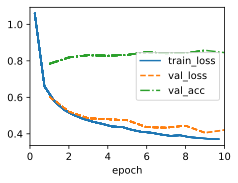

In [6]:
class MLP(d2l.Classifier) : 
    def __init__(self, num_outputs, num_hiddens, lr) : 
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(num_hiddens),
            nn.ReLU(),
            nn.LazyLinear(num_outputs)
        )

# We don't need forward here

model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)


#### Tasks : 
1. `nn.LazyLinear()` : What are those ? 
2. `nn.Flatten` : What does this do ?
3. How is it calculating the dimension in between using `nn.LazyLinear()`

#### Learnings : 
1. Implementing it from scratch is good but messy because you need to define everything and if you want to change anything then problems might occur.